Question 3. After re-analysing the dataset you investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola Flipkart. Oyo and Paytm

# Importing required libraries

In [41]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Loading and cleaning data

In [3]:
df = pd.read_csv("startup_funding.csv" , encoding = "UTF-8")

In [4]:
df.rename(columns = {'Date dd/mm/yyyy': "Date"} , inplace = True)
df.rename(columns = {'Startup Name': "StartupName"}, inplace = True)
df.rename(columns = {'Industry  Vertical':'IndustryVertical'}, inplace = True)
df.rename(columns = {'City  Location': "City"}, inplace = True)
df.rename(columns = {'Investors Name':"InvestorsName"}, inplace = True)
df.rename(columns = {'Amount in USD':'AmountInUSD'}, inplace = True)
df.rename(columns = {'InvestmentnType':'InvestmentType'}, inplace = True)

In [5]:
df.head()

,Sr No,Date,StartupName,Industry Vertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [6]:
df.StartupName.replace('Ola Cabs', 'Ola' , inplace = True)
df.StartupName.replace('Ola Electric', 'Ola' , inplace = True)
df.StartupName.replace('Olacabs', 'Ola' , inplace = True)
df.StartupName.replace('Flipkart.com', 'Flipkart' , inplace = True)
df.StartupName.replace('OyoRooms', 'Oyo' , inplace = True)
df.StartupName.replace('OYO Rooms', 'Oyo' , inplace = True)
df.StartupName.replace('Oyo Rooms', 'Oyo' , inplace = True)
df.StartupName.replace('Oyorooms', 'Oyo' , inplace = True)
df.StartupName.replace('OYOfit', 'Oyo' , inplace = True)
df.StartupName.replace('Paytm Marketplace', 'Paytm' , inplace = True)

# Solving problem statement

In [20]:
startup = np.array(df.StartupName)  #converting startup names and investor names into numpy array
invest = np.array(df.InvestorsName)
# investors names has multiple names in one rows separated by 'commas' and ' and '. By using split function
#we will separate the names and store the investors name as key and companies name as value in dct dictionary
dct = {}
for rows in range(len(invest)):
    i = str(invest[rows]).split(', ')
    
    for k in range(len(i)):
        j = i[k].split(' and ')
        
        for p in range(len(j)):
            m = j[p].split(',')
            
            for n in m:
                if n == " " or n == '' or n == 'Undisclosed Investors' or n == 'Undisclosed investors':
                    continue
                if n not in dct:
                    dct[n] = [startup[rows]]
                else:
                    dct[n].append(startup[rows])
# above dictionary contain multiple number of companies name against corresponding invrstors name. But we need
#investors name who invested in different companies. wso, we will use unique() or set() to make remove duplicate companies
# and find its number by using len().


for keys in dct:
    dct[keys] = len(set(dct[keys]))
    
#sorting dct dictionary

sort_dct = {key: val for key, val in sorted(dct.items(), key = lambda ele:ele[1], reverse = True)}
# using counter to extract top 5 investors
k = Counter(sort_dct)

top_5 = k.most_common(5)

investment_name = []        
num = []

for i in range(5):
    investment_name.append(top_5[i][0])
    num.append(top_5[i][1])

# Plotting graph

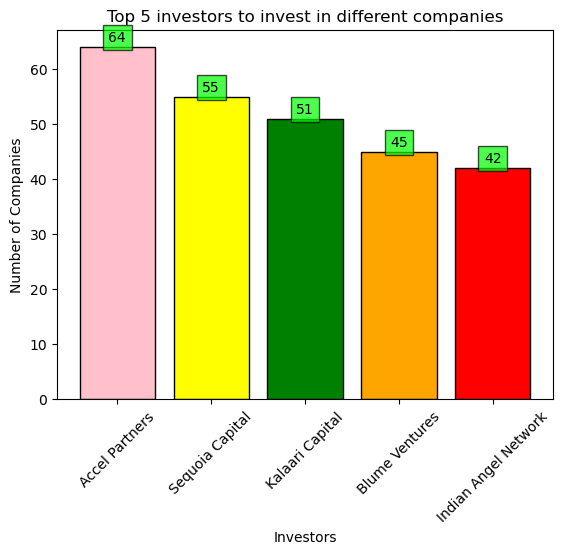

In [40]:
plt.bar(investment_name , num , color = ["pink" , "yellow", "green","orange","red"] , edgecolor = "black")

plt.xticks(rotation = 45)
plt.title("Top 5 investors to invest in different companies")
plt.xlabel("Investors")
plt.ylabel("Number of Companies")
for i in range(len(investment_name)):
    plt.text(i , num[i]+1 , num[i] , ha = "center" , bbox = dict(facecolor = "lime" , alpha = 0.7))
plt.show()